In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Github/tp_inf3236_groupe17


/content/drive/MyDrive/Github/tp_inf3236_groupe17


# FROM DIVIDING LINES TO NEURAL NETWORKS

#1. LINE SEPARATION

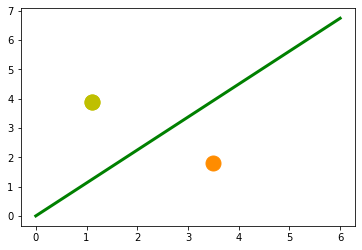

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or",
        color="darkorange",
        markersize=15)
ax.plot(1.1, 3.9, "oy",
        markersize=15)

point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

In [ ]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])
# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


<function matplotlib.pyplot.show>

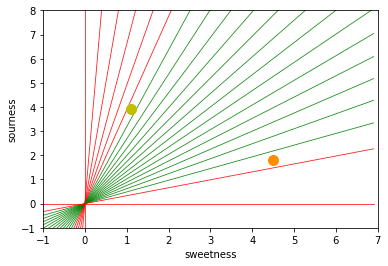

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_distance_function(a, b, c):
  """ 0 = ax + by + c """
  def distance(x, y):
    """
    returns tuple (d, pos)
    d is the distance
    If pos == -1 point is below the line,
    0 on the line and +1 if above the line
    """
    nom = a * x + b * y + c
    if nom == 0:
      pos = 0
    elif (nom<0 and b<0) or (nom>0 and b>0):
      pos = -1
    else:
      pos = 1
    return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
  return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)


step = 0.05
for x in np.arange(0, 1+step, step):
  slope = np.tan(np.arccos(x))
  dist4line1 = create_distance_function(slope, -1, 0)
  Y = slope * X
  results = []
  for point in fruits_coords:
    results.append(dist4line1(*point))
  if (results[0][1] != results[1][1]):
    ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
  else:
    ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
  if index== 0:
    ax.plot(x, y, "o",
            color="darkorange",
            markersize=size)

  else:
    ax.plot(x, y, "oy",
            markersize=size)
plt.show
  

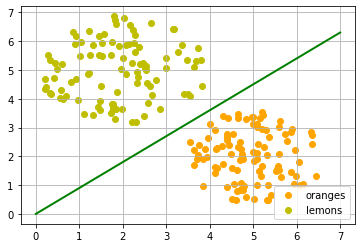

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius,
                          center=(0, 0),
                          number_of_points=100):
  center_x, center_y = center
  r = radius * np.sqrt(np.random.random((number_of_points,)))
  theta = np.random.random((number_of_points,)) * 2 * np.pi
  x = center_x + r * np.cos(theta)
  y = center_y + r * np.sin(theta)
  return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x,
            oranges_y,
            c="orange",
            label="oranges")
ax.scatter(lemons_x,
           lemons_y,
            c="y",
            label="lemons")


ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()

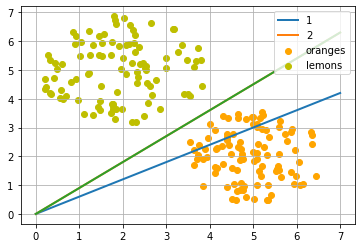

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 8)
fig, ax = plt.subplots()

ax.scatter(oranges_x,
          oranges_y,
          c="orange",
          label="oranges")
ax.scatter(lemons_x,
           lemons_y,
            c="y",
            label="lemons")


fruits = list(zip(oranges_x,
              oranges_y,
              repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
                lemons_y,
                repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
  line = None
  counter = 0
  for x, y, label in fruits:
    res = slope * x - y
    #print(label, res)
    if label == 0 and res < 0:
      # point is above line but should be below
      # => increment slope
      slope += learning_rate
      counter += 1
      ax.plot(X, slope * X,
              linewidth=2, label=str(counter))
    elif label == 1 and res > 0:
      # point is below line but should be above
      # => decrement slope
      #print(res, label)
      slope -= learning_rate
      counter += 1
      ax.plot(X, slope * X,
                linewidth=2, label=str(counter))
  return slope
slope = adjust()
ax.plot(X,
slope * X,
linewidth=2)
ax.legend()
ax.grid()
plt.show()

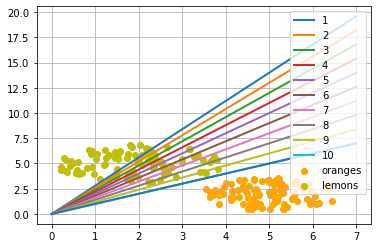

0.9999999999999996


In [ ]:
X = np.arange(0, 8)
fig, ax = plt.subplots()

ax.scatter(oranges_x,
          oranges_y,
          c="orange",
          label="oranges")
ax.scatter(lemons_x,
            lemons_y,
            c="y",
            label="lemons")

slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,
        slope * X,
        linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

#2. A SIMPLE NEURAL NETWORK

In [ ]:
import numpy as np

In [ ]:
class Perceptron:
  def __init__(self, weights):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    return weighted_sum

p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
  res = p(point)
  print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
  res = p(point)
  print(res, end=", ")

-1.2234399400273024, -0.6484824171128558, -1.562656126869758, -1.3300347502975325, -2.2444218005415326, -1.2339522519802877, -1.1409544960377223, -0.7870589648471396, -0.35169800034363474, -2.2256749520008174, 1.5128205855305878, 1.8294941612260072, 1.2297341210492947, 1.7130421704925776, 1.4157882805459245, 1.4329692897274176, 0.9139878258280276, 2.3076130627259825, 1.7368397878833985, 1.5031830811335785, 

In [ ]:
from collections import Counter

evaluation = Counter()
for point in zip(oranges_x, oranges_y):
  res = p(point)
  if res < 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
  res = p(point)
  if res >= 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1
print(evaluation)

Counter({'corrects': 200})


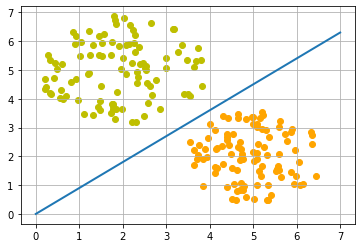

0.9


In [ ]:
import time
import matplotlib.pyplot as plt

slope = 0.1
X = np.arange(0, 8)

fig, ax = plt.subplots()
ax.scatter(oranges_x,
            oranges_y,
            c="orange",
            label="oranges")
ax.scatter(lemons_x,
            lemons_y,
            c="y",
            label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)

ax.grid()
plt.show()
print(slope)

#3. TRAINING A NEURAL NETWORK

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                      [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels,
                        train_size=0.8,
                        test_size=0.2,
                        random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(4.842253124044144, 3.293323614423858), (5.5354793116367125, 1.48211382388125), (4.633635021097192, 1.5136047138575472), (4.715158908339576, 1.0581626574411924), (0.962978457042851, 3.964287870442339), (5.947905236260769, 1.0252799428172241), (0.9219726200008986, 6.19488709809746), (0.34664316658870153, 4.177445661481061), (5.989335619453284, 1.305867985912295), (2.3523620137444667, 4.751165514391727)] [0, 0, 0, 0, 1, 0, 1, 1, 0, 1]


In [ ]:
import numpy as np
from collections import Counter

class Perceptron:
  def __init__(self,
                weights,
                learning_rate=0.1):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
    self.learning_rate = learning_rate
  @staticmethod
  def unit_step_function(x):
    if x < 0:
      return 0
    else:
      return 1
  def __call__(self, in_data):
    weighted_input = self.weights * in_data
    weighted_sum = weighted_input.sum()
    #print(in_data, weighted_input, weighted_sum)
    return Perceptron.unit_step_function(weighted_sum)
  def adjust(self,
              target_result,
              calculated_result,
              in_data):
    if type(in_data) != np.ndarray:
      in_data = np.array(in_data) #
    error = target_result - calculated_result
    if error != 0:
      correction = error * in_data * self.learning_rate
      self.weights += correction
      #print(target_result, calculated_result, error, in_data, correction, self.weights)
  def evaluate(self, data, labels):
    evaluation = Counter()
    for index in range(len(data)):
      label = int(round(p(data[index]),0))
      if label == labels[index]:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(train_data)):
  p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
  
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.79080358  2.03216767]


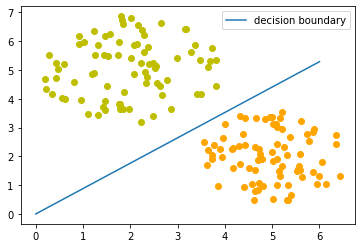

[-1.79080358  2.03216767]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

0 -1.523288714667545 [-1.35267594 -0.88799708] (4.842253124044144, 3.293323614423858)
4 3.530767544664277 [-1.0637824   0.30128928] (0.962978457042851, 3.964287870442339)
9 0.2073819775071009 [-0.3580738   1.72663893] (2.3523620137444667, 4.751165514391727)
15 1.5241843728148357 [-1.76785278  1.15986806] (4.699263265753027, 1.8892362280580717)
43 0.24058236134853658 [-0.6618078   2.75085755] (3.686816569280827, 5.303298288296846)
45 0.8812282599738357 [-1.79080358  2.03216767] (3.763319246025873, 2.3956329347444556)


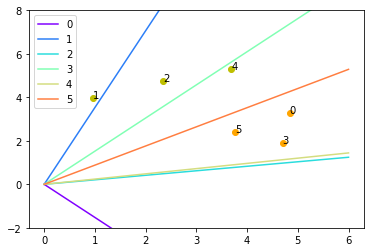

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
  old_weights = p.weights.copy()
  p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
  if not np.array_equal(old_weights, p.weights):
    color = "orange" if train_labels[index] == 0 else"y"
    ax.scatter(train_data[index][0],
                train_data[index][1],
                color=color)
    ax.annotate(str(counter),
                 (train_data[index][0], train_data[index][1]))
    m = -p.weights[0] / p.weights[1]
    print(index, m, p.weights, train_data[index])
    ax.plot(X, m * X, label=str(counter), color=colors[counter])
    counter += 1
    
ax.legend()
plt.show()

# SIMPLE NEURAL NETWORKS

#4. LINEARLY SEPARABLE DATA SETS

[]

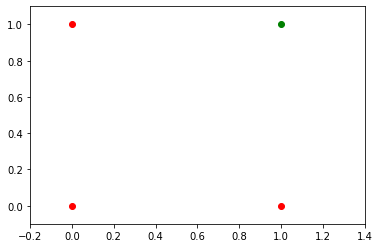

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

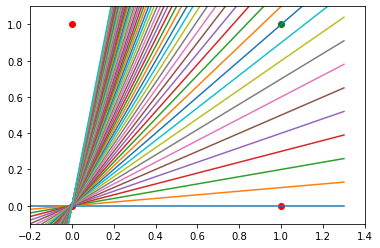

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
  ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

[]

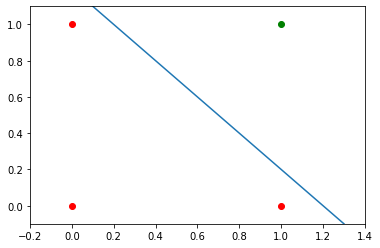

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
#SINGLE PERCEPTRON WITH A BIAS
import numpy as np
from collections import Counter
class Perceptron:
  def __init__(self,
              weights,
              bias=1,
              learning_rate=0.3):
    """
    'weights' can be a numpy array, list or a tuple with the
    actual values of the weights. The number of input values
    is indirectly defined by the length of 'weights'
    """
    self.weights = np.array(weights)
    self.bias = bias
    self.learning_rate = learning_rate

  @staticmethod
  def unit_step_function(x):
    if x <= 0:
     return 0
    else:
      return 1
  def __call__(self, in_data):
    in_data = np.concatenate( (in_data, [self.bias]) )
    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)
  def adjust(self,
              target_result,
              in_data):
    if type(in_data) != np.ndarray:

      in_data = np.array(in_data) #
    calculated_result = self(in_data)
    error = target_result - calculated_result
    if error != 0:
      in_data = np.concatenate( (in_data, [self.bias]) )
      correction = error * in_data * self.learning_rate
      self.weights += correction
  def evaluate(self, data, labels):
    evaluation = Counter()
    for sample, label in zip(data, labels):
      result = self(sample) # predict
      if result == label:
        evaluation["correct"] += 1
      else:
        evaluation["wrong"] += 1
    return evaluation

In [ ]:
import numpy as np
from perceptrons import Perceptron

def labelled_samples(n):
  for _ in range(n):
    s = np.random.randint(0, 2, (2,))
    yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.2)

for in_data, label in labelled_samples(30):
  p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

ModuleNotFoundError: ignored

IndexError: ignored

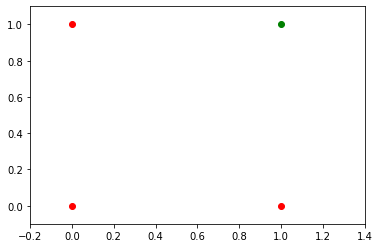

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,
                              centers=([2.5, 3], [6.7, 7.9]),
                              random_state=0)

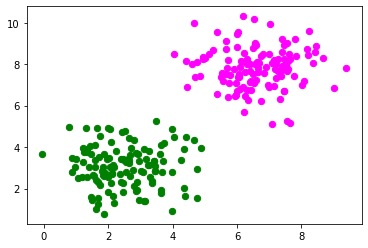

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
  ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
              c=colours[n_class], s=40, label=str(n_class))

In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
                learning_rate=0.8)

for sample, label in zip(learn_data, learn_labels):
  p.adjust(label,
            sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

ModuleNotFoundError: ignored

IndexError: ignored

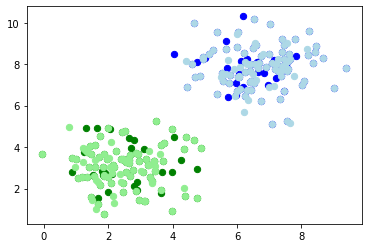

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
  ax.scatter(learn_data[learn_labels==n_class][:, 0],
              learn_data[learn_labels==n_class][:, 1],
              c=colours[n_class], s=40, label=str(n_class))
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
  ax.scatter(test_data[test_labels==n_class][:, 0],
              test_data[test_labels==n_class][:, 1],
              c=colours[n_class], s=40, label=str(n_class))
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

# NEURAL NETWORKS, STRUCTURE,WEIGHTS AND MATRICES

INTRODUCTION

In [33]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [34]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


#5.INITIALIZING THE WEIGHT MATRICES

In [35]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


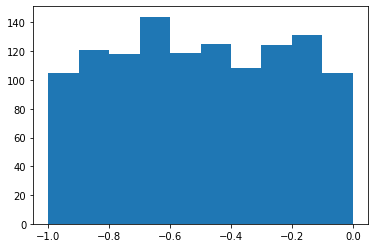

In [36]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

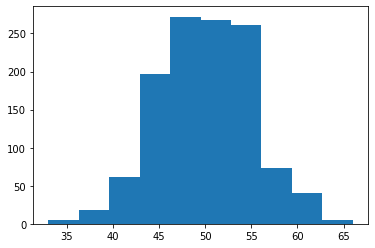

In [37]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

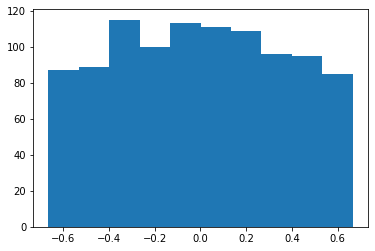

In [38]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

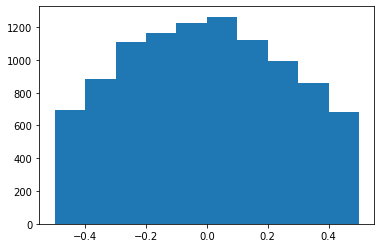

In [40]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
  (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

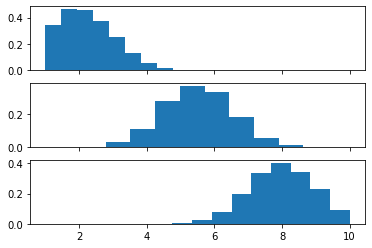

In [41]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [42]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.57112198,  0.3810836 ,  0.48059548],
       [-0.28918984,  0.314911  , -0.05044978],
       [ 0.11161863,  0.37202484,  0.54514393],
       [ 0.40415461,  0.57173139,  0.48716464]])

In [44]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.06343859,  0.30838438,  0.47996181,  0.12846014],
       [-0.08869223, -0.23237868,  0.08850909,  0.33889047]])

#. RUNNING A NEURAL NETWORK WITH PYTHON